# Stationary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

## white noise

In [35]:
num_timestep = 300
np.random.seed(100)
y = np.random.normal(loc=0,scale=1,size= num_timestep)
time_range = pd.date_range(start='2022-01-01',periods=num_timestep)
df = pd.DataFrame(y , index=time_range, columns=['y'])

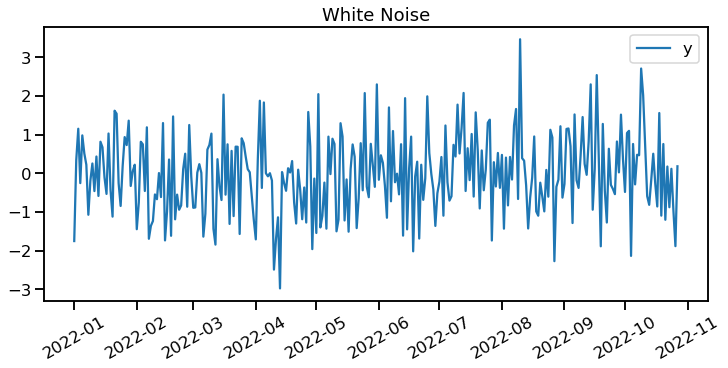

In [43]:
plt.figure(figsize=(10,5),constrained_layout=True)
plt.plot(df['y'], label='y')
plt.xticks(rotation=30)
plt.title('White Noise')
plt.legend()

 ## AR(1)

### Φ=0.9

In [3]:
num_timestep = 1000
np.random.seed(100)
time_range = pd.date_range(start='2022-01-01',periods=num_timestep)

phi = 0.9
c = 2
y = np.zeros(num_timestep)
y[0] = c
for t in range(1,num_timestep):
    noise = np.random.randn()
    y[t] = phi*y[t-1] + noise
    
df = pd.DataFrame(y , index=time_range, columns=['y'])

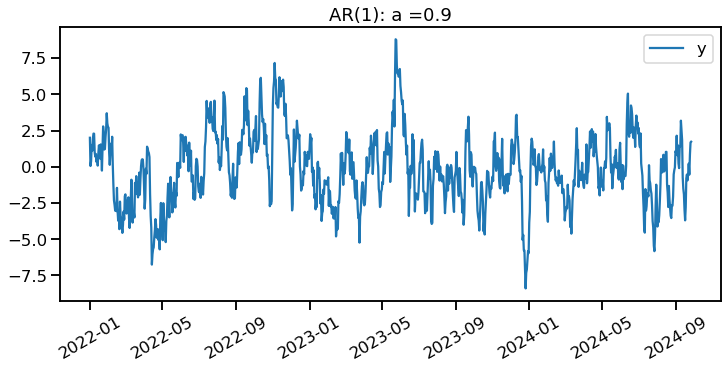

In [4]:
plt.figure(figsize=(10,5),constrained_layout=True)
plt.plot(df['y'], label='y')
plt.xticks(rotation=30)
plt.title('AR(1): a =0.9')
plt.legend()

### Φ=1.2

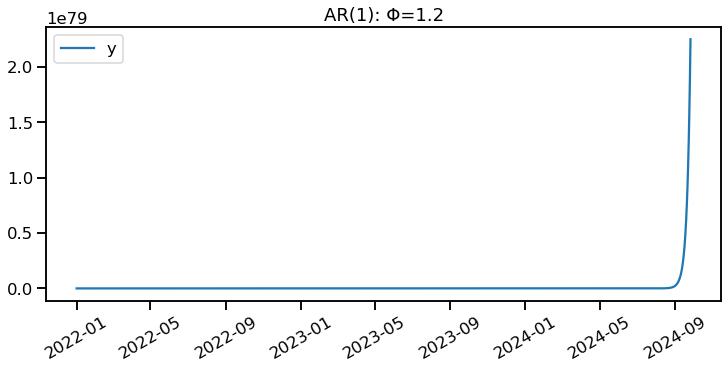

In [6]:
num_timestep = 1000
np.random.seed(100)
time_range = pd.date_range(start='2022-01-01',periods=num_timestep)

phi = 1.2
c = 2
y = np.zeros(num_timestep)
y[0] = c
for t in range(1,num_timestep):
    noise = np.random.randn()
    y[t] = phi*y[t-1] + noise
    
df = pd.DataFrame(y , index=time_range, columns=['y'])

plt.figure(figsize=(10,5),constrained_layout=True)
plt.plot(df['y'], label='y')
plt.xticks(rotation=30)
plt.title(f'AR(1): Φ={phi}')
plt.legend()


Text(0.5, 1.0, 'AR(1): a=1.2, 20~40')

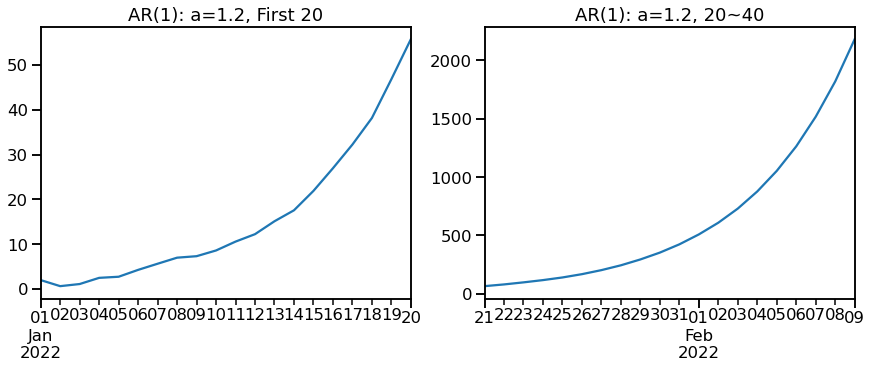

In [7]:
num_timestep = 1000
np.random.seed(100)
time_range = pd.date_range(start='2022-01-01',periods=num_timestep)

phi = 1.2
c = 2
y = np.zeros(num_timestep)
y[0] = c
for t in range(1,num_timestep):
    noise = np.random.randn()
    y[t] = phi*y[t-1] + noise
    
df = pd.DataFrame(y , index=time_range, columns=['y'])

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,5),constrained_layout=True)
axs[0] = df['y'].iloc[:20].plot(ax=axs[0]) 
# axs[0].set_xticks
axs[0].set_title(f'AR(1): a={phi}, First 20')

axs[1] = df['y'].iloc[20:40].plot(ax=axs[1]) 
# axs[1].set_xticks(rotation=30)
axs[1].set_title(f'AR(1): a={phi}, 20~40')

### Φ= -1.2

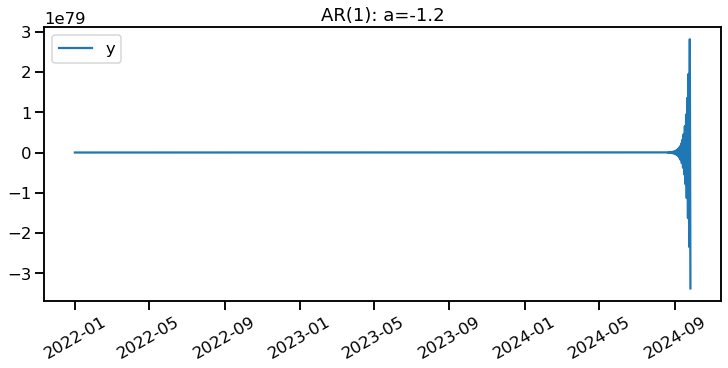

In [8]:
num_timestep = 1000
np.random.seed(100)
time_range = pd.date_range(start='2022-01-01',periods=num_timestep)

phi = -1.2
c = 2
y = np.zeros(num_timestep)
y[0] = c
for t in range(1,num_timestep):
    noise = np.random.randn()
    y[t] = phi*y[t-1] + noise
    
df = pd.DataFrame(y , index=time_range, columns=['y'])

plt.figure(figsize=(10,5),constrained_layout=True)
plt.plot(df['y'], label='y')
plt.xticks(rotation=30)
plt.title(f'AR(1): a={phi}')
plt.legend()


Text(0.5, 1.0, 'AR(1): a=-1.2, 20~40')

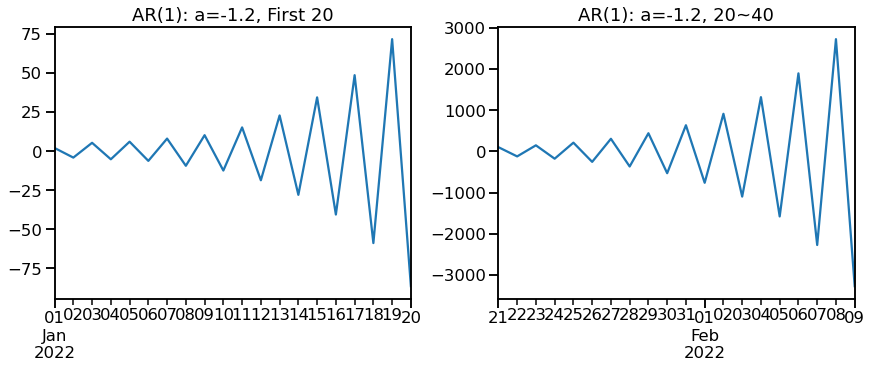

In [9]:
num_timestep = 1000
np.random.seed(100)
time_range = pd.date_range(start='2022-01-01',periods=num_timestep)

phi = -1.2
c = 2
y = np.zeros(num_timestep)
y[0] = c
for t in range(1,num_timestep):
    noise = np.random.randn()
    y[t] = phi*y[t-1] + noise
    
df = pd.DataFrame(y , index=time_range, columns=['y'])

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,5),constrained_layout=True)
axs[0] = df['y'].iloc[:20].plot(ax=axs[0]) 
# axs[0].set_xticks
axs[0].set_title(f'AR(1): a={phi}, First 20')

axs[1] = df['y'].iloc[20:40].plot(ax=axs[1]) 
# axs[1].set_xticks(rotation=30)
axs[1].set_title(f'AR(1): a={phi}, 20~40')

### Φ= 1

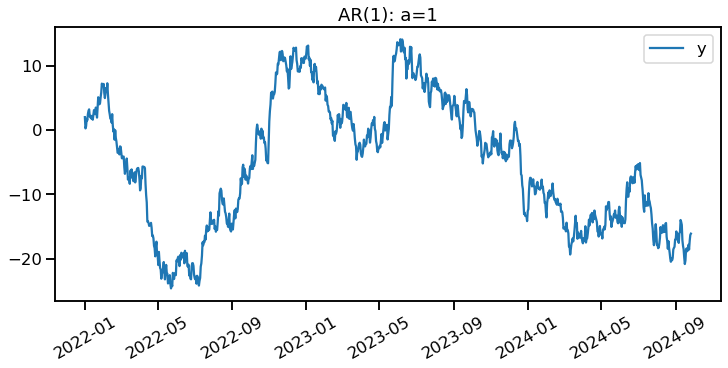

In [10]:
num_timestep = 1000
np.random.seed(100)
time_range = pd.date_range(start='2022-01-01',periods=num_timestep)

phi = 1
c = 2
y = np.zeros(num_timestep)
y[0] = c
for t in range(1,num_timestep):
    noise = np.random.randn()
    y[t] = phi*y[t-1] + noise
    
df = pd.DataFrame(y , index=time_range, columns=['y'])

plt.figure(figsize=(10,5),constrained_layout=True)
plt.plot(df['y'], label='y')
plt.xticks(rotation=30)
plt.title(f'AR(1): a={phi}')
plt.legend()


# ADF test

https://www.youtube.com/watch?v=1opjnegd_hA

In [11]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' %  result[0])
    print('p-value: %f' %  result[1])

In [12]:
def make_AR_series(lags, coefs, length):
    
    # 계수를 array 형태로
    coefs = np.array(coefs)
    
    # initial values: AR공식 처음 계산에 쓰이는 과거값(yt-1, yt-2, ...)
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        # 이전값 마지막 lag수 만큼 거꾸로
        prev_val = series[-lags:][::-1]
        
        # 노이즈
        noise = np.random.normal()
        
        # AR공식에 의한 새로운 값
        new_val = np.sum(coefs * np.array(prev_val) ) + noise 
        
        series.append(new_val)
        
    return series

In [13]:
# lag1, a=0.8
series = make_AR_series(1, 0.8, 1000)
perform_adf_test(series)

ADF Statistic: -11.065879
p-value: 0.000000


In [14]:
# lag1, a=1.2
series = make_AR_series(1, 1.2, 100)
perform_adf_test(series)

ADF Statistic: 11.399264
p-value: 1.000000


In [17]:
# lag1, a= 1
series = make_AR_series(1, 1, 100)
perform_adf_test(series)

ADF Statistic: -1.804719
p-value: 0.378122


In [15]:
## lag2, a= 0.3, 0.5
series = make_AR_series(2, [0.3,0.5], 1000)
perform_adf_test(series)

ADF Statistic: -9.052711
p-value: 0.000000


In [16]:
## lag2, a= 0.4, 0.6
series = make_AR_series(2, [0.4,0.6], 1000)
perform_adf_test(series)

ADF Statistic: -1.638712
p-value: 0.462934
